# SEGUNDO EXAMEN PARCIAL VISIÓN POR COMPUTADORA

- Alumna Dolly Gwendoline López Rosas
- NUA 379969
- Correo dg.lopezrosas@ugto.mx

* Doctora María Susana Ávila García

En un cuaderno de Jupyter usando Pyhton extraer las regiones de las fichas en rodo de la imagen 
“Red Bottle Caps.jpg” y generar una generar una imagen binaria como las que se muestra en el 
ejemplo (valor 75%) y rellenar cada una de las regiones de las fichas con colores del arcoíris (25%). 

In [1]:
# El primer paso que vamos a hacer es importar las librerías que vamos a utilizar

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

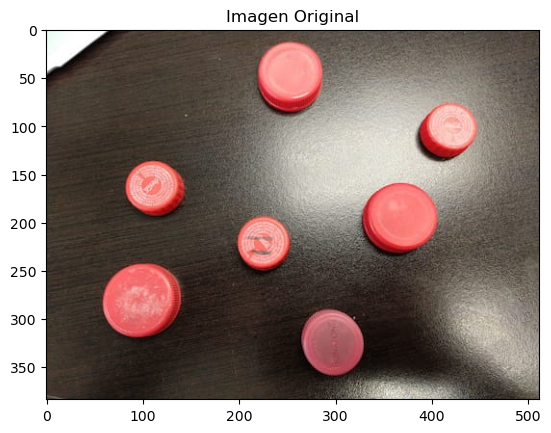

In [11]:
# Cargamos la imagen original, y la convertimos a formato rgb y por último la mostramos

img = cv.imread('./images/Red Bottle Caps.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Imagen Original")
plt.show()

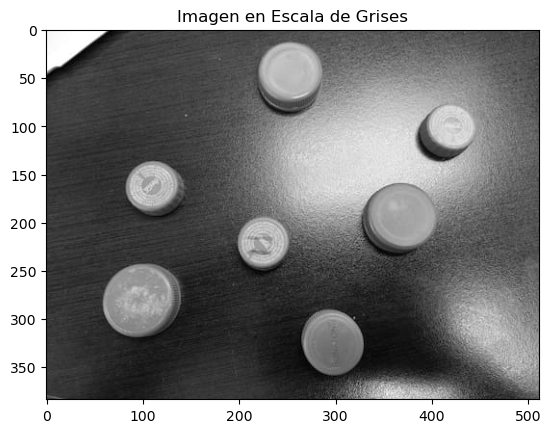

True

In [13]:
# Cuando realizamos los siguientes pasos, obtenemos una imagen en escala de grises que es una representación mucho mas
# simple de la imagen original y es mas sencilla su manipulación

# Convertimos la imagen original a escala de grises
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Mostramos la imagen en escala de grises
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.show()

# Guardamos la imagen en escala de grises
cv.imwrite('./images/imagen_gris.jpg', img_gray)

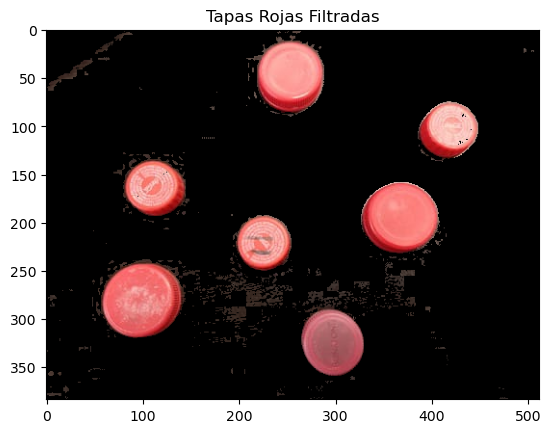

True

In [39]:
# Convertimos la imagen original a espacio de color HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Definimos los límites para el color rojo de las tapas en HSV
tapas_rojas_bajo1 = np.array([0, 50, 50])  # Primer rango de rojo
tapas_rojas_alto1 = np.array([10, 255, 255])
tapas_rojas_bajo2 = np.array([170, 50, 50])  # Segundo rango de rojo
tapas_rojas_alto2 = np.array([180, 255, 255])

# Creamos dos máscaras para cubrir ambos rangos de rojo
mascara_rojo1 = cv.inRange(img_hsv, tapas_rojas_bajo1, tapas_rojas_alto1)
mascara_rojo2 = cv.inRange(img_hsv, tapas_rojas_bajo2, tapas_rojas_alto2)

# Combinamos ambas máscaras
mascara_rojo = cv.bitwise_or(mascara_rojo1, mascara_rojo2)

# Aplicamos la máscara a la imagen original
img_filtrada = cv.bitwise_and(img, img, mask=mascara_rojo)

# Mostramos la imagen con solo las tapas rojas
plt.imshow(cv.cvtColor(img_filtrada, cv.COLOR_BGR2RGB))
plt.title("Tapas Rojas Filtradas")
plt.show()

# Guardamos la imagen filtrada
cv.imwrite('./images/tapas_rojas_filtradas.jpg', img_filtrada)

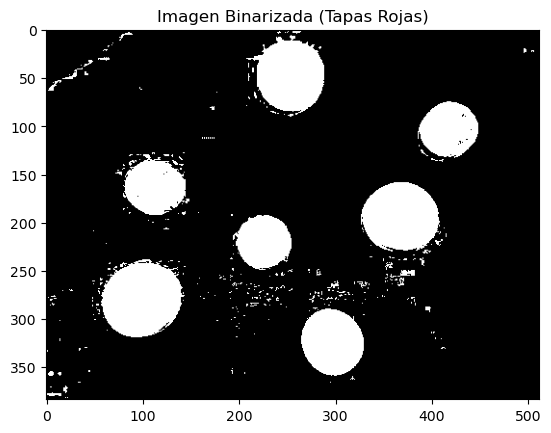

True

In [41]:
# Convertimos la imagen filtrada a escala de grises
img_filtrada_gris = cv.cvtColor(img_filtrada, cv.COLOR_BGR2GRAY)

# Aplicamos un umbral para binarizar la imagen
_, img_binarizada = cv.threshold(img_filtrada_gris, 50, 255, cv.THRESH_BINARY)

# Mostramos la imagen binarizada
plt.imshow(img_binarizada, cmap='gray')
plt.title("Imagen Binarizada (Tapas Rojas)")
plt.show()

# Guardamos la imagen binarizada
cv.imwrite('./images/imagen_binarizada_tapas.jpg', img_binarizada)

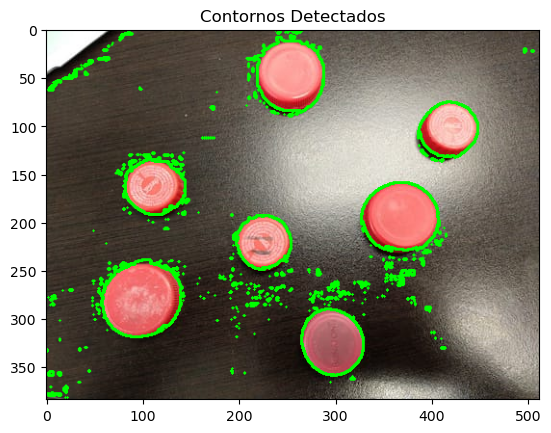

True

In [43]:
# Detectamos los contornos en la imagen binarizada
contornos, _ = cv.findContours(img_binarizada, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Creamos una copia de la imagen original para dibujar los contornos
img_contornos = img.copy()

# Dibujamos los contornos detectados
cv.drawContours(img_contornos, contornos, -1, (0, 255, 0), 2)

# Mostramos la imagen con los contornos dibujados
plt.imshow(cv.cvtColor(img_contornos, cv.COLOR_BGR2RGB))
plt.title("Contornos Detectados")
plt.show()

# Guardamos la imagen con los contornos
cv.imwrite('./images/imagen_contornos_detectados.jpg', img_contornos)

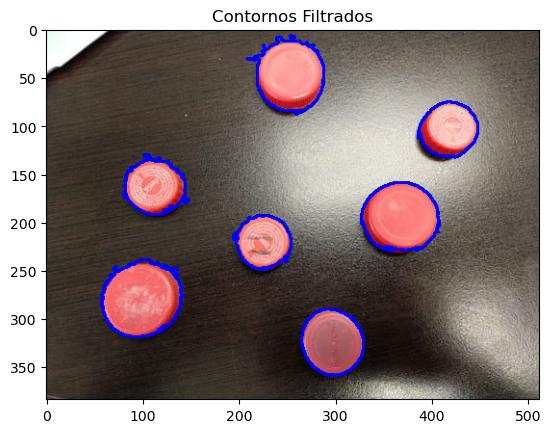

True

In [47]:
# Filtramos los contornos por área mínima
area_minima = 500
contornos_filtrados = [c for c in contornos if cv.contourArea(c) > area_minima]

# Creamos una nueva copia para dibujar solo los contornos filtrados
img_contornos_filtrados = img.copy()

# Dibujamos los contornos filtrados
cv.drawContours(img_contornos_filtrados, contornos_filtrados, -1, (255, 0, 0), 2)

# Mostramos la imagen con los contornos filtrados
plt.imshow(cv.cvtColor(img_contornos_filtrados, cv.COLOR_BGR2RGB))
plt.title("Contornos Filtrados")
plt.show()

# Guardamos la imagen con los contornos filtrados
cv.imwrite('./images/imagen_contornos_filtrados.jpg', img_contornos_filtrados)

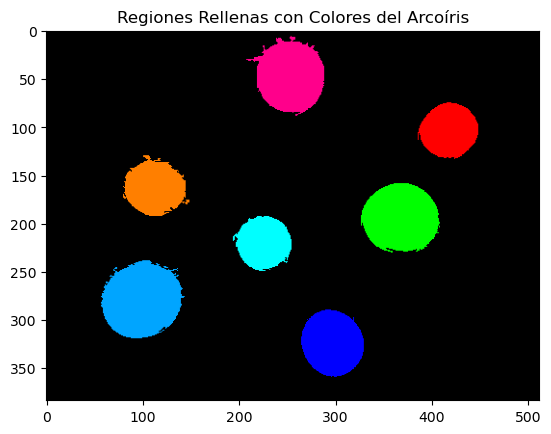

True

In [49]:
# Crear una imagen en blanco para el resultado
img_arcoiris = np.zeros_like(img)

# Definir los colores del arcoíris
colores_arcoiris = [
    (255, 0, 0),    # Rojo
    (255, 165, 0),  # Naranja
    (255, 255, 0),  # Amarillo
    (0, 255, 0),    # Verde
    (0, 127, 255),  # Azul Claro
    (0, 0, 255),    # Azul
    (139, 0, 255)   # Violeta
]

# Rellenar cada contorno con un color del arcoíris
for i, contorno in enumerate(contornos_filtrados): 
    color = colores_arcoiris[i % len(colores_arcoiris)]
    cv.drawContours(img_arcoiris, [contorno], -1, color, thickness=cv.FILLED)

# Mostramos la imagen resultante
plt.imshow(cv.cvtColor(img_arcoiris, cv.COLOR_BGR2RGB))
plt.title("Regiones Rellenas con Colores del Arcoíris")
plt.show()

# Guardamos la imagen
cv.imwrite('./images/imagen_regiones_arcoiris.jpg', img_arcoiris)